# Panorama dos candidatos na eleição de 2022

Há duas semanas do primeiro turno das eleições, a tensão está no ar. Como cidadão consciente da necessidade de defender ideias e opiniões, peguei as minhas e fui em busca de pessoas pretas, mulheres, indígenas e de esquerda.

Comecei catalogando os partidos atuais e uma classificação de espectro político de cada um deles. Está sendo usado uma pequisa do (Poder360)[https://poder360.com.br], minha referência foi a (wikipedia)[https://pt.wikipedia.org/wiki/Lista_de_partidos_pol%C3%ADticos_do_Brasil].

In [172]:
import pandas as pd
import glob
import os

espectro = 'esquerda'

partidos = pd.read_csv('./partidos.csv', index_col=0, delimiter=',')
partidos = partidos.loc[partidos['ESPECTRO_POLITICO'] == espectro]
partidos

,SIGLA,NOME,DEFERIMENTO,PRES. NACIONAL,Nº DA LEGENDA,ESPECTRO_POLITICO
1,,,,,,
11,CIDADANIA,CIDADANIA,19.3.1992,ROBERTO JOÃO PEREIRA FREIRE,23,esquerda
16,PCB,PARTIDO COMUNISTA BRASILEIRO,9.5.1996,EDMILSON SILVA COSTA*,21,esquerda
5,PCdoB,PARTIDO COMUNISTA DO BRASIL,23.6.1988,LUCIANA BARBOSA DE OLIVEIRA SANTOS,65,esquerda
19,PCO,PARTIDO DA CAUSA OPERÁRIA,30.9.1997,RUI COSTA PIMENTA,29,esquerda
3,PDT,PARTIDO DEMOCRÁTICO TRABALHISTA,10.11.1981,CARLOS LUPI,12,esquerda
10,PMN,PARTIDO DA MOBILIZAÇÃO NACIONAL,25.10.1990,ANTONIO CARLOS BOSCO MASSAROLLO,33,esquerda
6,PSB,PARTIDO SOCIALISTA BRASILEIRO,1°.7.1988,CARLOS ROBERTO SIQUEIRA DE BARROS,40,esquerda
22,PSOL,PARTIDO SOCIALISMO E LIBERDADE,15.9.2005,JULIANO MEDEIROS,50,esquerda
15,PSTU,PARTIDO SOCIALISTA DOS TRABALHADORES UNIFICADO,19.12.1995,JOSÉ MARIA DE ALMEIDA,16,esquerda


Utilizando os arquivos fornecidos pelo TSE, concatenei a lista das pessoas candidatas.

In [173]:
path = r'./' # use your path
all_files = glob.glob(os.path.join(path , "*.csv"))

li = []

for filename in all_files:
    # df = pd.read_csv(filename, index_col=None, header=0)
    df = pd.read_csv(filename, index_col=None, header=0, encoding='iso-8859-1', delimiter=';', dtype = str)
    li.append(df)

candidatos = pd.concat(li, axis=0, ignore_index=True)
candidatos = candidatos.loc[candidatos['SG_PARTIDO'].isin(partidos['SIGLA'])]
candidatos = candidatos.loc[candidatos['DS_SITUACAO_CANDIDATURA'] == 'APTO']
candidatos = candidatos[[
    "SG_UF", "DS_CARGO", "SQ_CANDIDATO", "NM_URNA_CANDIDATO", "DS_SITUACAO_CANDIDATURA", "SG_PARTIDO", "NM_MUNICIPIO_NASCIMENTO", "DT_NASCIMENTO", "NR_IDADE_DATA_POSSE", "CD_GENERO", "DS_GENERO", "CD_GRAU_INSTRUCAO", "DS_GRAU_INSTRUCAO", "CD_COR_RACA", "DS_COR_RACA", "CD_OCUPACAO", "DS_OCUPACAO"
]]
candidatos

,SG_UF,DS_CARGO,SQ_CANDIDATO,NM_URNA_CANDIDATO,DS_SITUACAO_CANDIDATURA,SG_PARTIDO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO
0,RJ,DEPUTADO ESTADUAL,190001620512,RIBAMAR DADINHO,APTO,PT,NOVA IGUAÇU,17/05/1968,54,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,02,PRETA,296,SERVIDOR PÚBLICO FEDERAL
14,RJ,DEPUTADO ESTADUAL,190001613873,MAJOR LUIGI,APTO,PMN,RIO DE JANEIRO,26/01/1967,56,2,MASCULINO,6,ENSINO MÉDIO COMPLETO,01,BRANCA,921,MILITAR REFORMADO
24,RJ,DEPUTADO ESTADUAL,190001721079,PROFESSOR GERALDO HONÓRIO,APTO,PSTU,CONSELHEIRO PENA,12/03/1957,65,2,MASCULINO,8,SUPERIOR COMPLETO,02,PRETA,265,PROFESSOR DE ENSINO FUNDAMENTAL
26,RJ,DEPUTADO FEDERAL,190001645424,LUCÉLIA SANTOS,APTO,PSB,SANTO ANDRÉ,20/05/1957,65,4,FEMININO,6,ENSINO MÉDIO COMPLETO,01,BRANCA,162,ATOR E DIRETOR DE ESPETÁCULOS PÚBLICOS
29,RJ,DEPUTADO ESTADUAL,190001620503,ALEX FREITAS BARTENDER,APTO,PT,RIO DE JANEIRO,28/06/1975,47,2,MASCULINO,4,ENSINO FUNDAMENTAL COMPLETO,01,BRANCA,999,OUTROS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58515,PB,DEPUTADO ESTADUAL,150001621653,PEDRO SEVERINO DE SOUSA,APTO,PSB,COREMAS,25/08/1956,66,2,MASCULINO,8,SUPERIOR COMPLETO,01,BRANCA,923,APOSENTADO (EXCETO SERVIDOR PÚBLICO)
58524,PB,DEPUTADO FEDERAL,150001621542,BRUNA SANTOS,APTO,PSOL,CABEDELO,22/05/1998,24,4,FEMININO,3,ENSINO FUNDAMENTAL INCOMPLETO,03,PARDA,999,OUTROS
58528,PB,VICE-GOVERNADOR,150001643179,MAÍSA CARTAXO,APTO,PT,CAJAZEIRAS,06/07/1972,50,4,FEMININO,8,SUPERIOR COMPLETO,03,PARDA,117,FARMACÊUTICO
58547,PB,DEPUTADO ESTADUAL,150001643182,CIDA RAMOS,APTO,PT,SAPÉ,16/06/1964,58,4,FEMININO,8,SUPERIOR COMPLETO,02,PRETA,277,DEPUTADO


Essa é a lista de possíveis candidaturas que eu apoiaria.

In [174]:
df = candidatos.loc[candidatos['SG_UF'] == 'SP']
df = df.loc[df['DS_GENERO'] == 'FEMININO']
df = df.loc[df['DS_COR_RACA'].isin(['PRETA', 'PARDA', 'INDÍGENA'])]
# df.groupby('DS_CARGO').size()
df


,SG_UF,DS_CARGO,SQ_CANDIDATO,NM_URNA_CANDIDATO,DS_SITUACAO_CANDIDATURA,SG_PARTIDO,NM_MUNICIPIO_NASCIMENTO,DT_NASCIMENTO,NR_IDADE_DATA_POSSE,CD_GENERO,DS_GENERO,CD_GRAU_INSTRUCAO,DS_GRAU_INSTRUCAO,CD_COR_RACA,DS_COR_RACA,CD_OCUPACAO,DS_OCUPACAO
18350,SP,DEPUTADO ESTADUAL,250001738743,LUIZA FERNANDES,APTO,PV,EMBU DAS ARTES,04/02/1985,38,4,FEMININO,8,SUPERIOR COMPLETO,03,PARDA,394,AUXILIAR DE ESCRITÓRIO E ASSEMELHADOS
18636,SP,DEPUTADO ESTADUAL,250001619362,DIDA COLETIVO EM TODAS LUTAS,APTO,PSOL,ARACAJU,03/12/1956,66,4,FEMININO,8,SUPERIOR COMPLETO,02,PRETA,125,ADMINISTRADOR
19221,SP,DEPUTADO ESTADUAL,250001726457,ANGÉLICA MARESIAS,APTO,PMN,COARACI,11/07/1977,45,4,FEMININO,7,SUPERIOR INCOMPLETO,02,PRETA,999,OUTROS
19249,SP,DEPUTADO ESTADUAL,250001619339,PROFESSORA ÉRIKA CÂNDIDO,APTO,PSOL,PINDAMONHANGABA,10/01/1983,40,4,FEMININO,8,SUPERIOR COMPLETO,02,PRETA,235,PROFESSOR E INSTRUTOR DE FORMAÇÃO PROFISSIONAL
19492,SP,DEPUTADO ESTADUAL,250001643606,MÃE LUH D OYA,APTO,PDT,SÃO PEDRO,11/06/1975,47,4,FEMININO,8,SUPERIOR COMPLETO,03,PARDA,125,ADMINISTRADOR
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56753,SP,DEPUTADO ESTADUAL,250001643277,MILLENE SANTOS,APTO,PMN,SÃO PAULO,15/04/1964,58,4,FEMININO,6,ENSINO MÉDIO COMPLETO,02,PRETA,113,ENFERMEIRO
56812,SP,DEPUTADO FEDERAL,250001613775,ALICE RIBEIRO,APTO,PSOL,SÃO PAULO,24/05/1995,27,4,FEMININO,6,ENSINO MÉDIO COMPLETO,03,PARDA,931,"ESTUDANTE, BOLSISTA, ESTAGIÁRIO E ASSEMELHADOS"
56815,SP,DEPUTADO ESTADUAL,250001611762,DEIA ZULU AFROFUTURISTA,APTO,PT,SÃO PAULO,05/10/1971,51,4,FEMININO,8,SUPERIOR COMPLETO,02,PRETA,137,RELAÇÕES-PÚBLICAS
56816,SP,DEPUTADO FEDERAL,250001610690,JACQUE CHANEL,APTO,PT,BELÉM,20/12/1964,58,4,FEMININO,6,ENSINO MÉDIO COMPLETO,03,PARDA,999,OUTROS


Fiz alguns agrupamentos, para ter uma ideia de proporção.

<AxesSubplot: ylabel='DS_GENERO'>

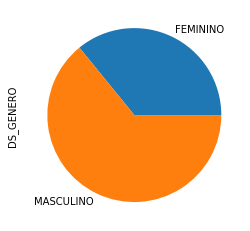

In [175]:
c_genero = candidatos.groupby(['DS_GENERO'])
c_genero['DS_GENERO'].count().plot(kind='pie')

<AxesSubplot: ylabel='DS_COR_RACA'>

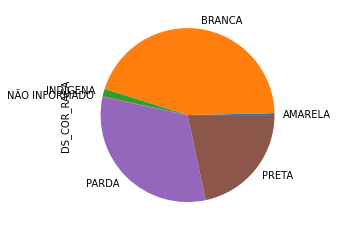

In [176]:
c_raca = candidatos.groupby(['DS_COR_RACA'])
c_raca['DS_COR_RACA'].count().plot(kind='pie')


<AxesSubplot: xlabel='DS_CARGO'>

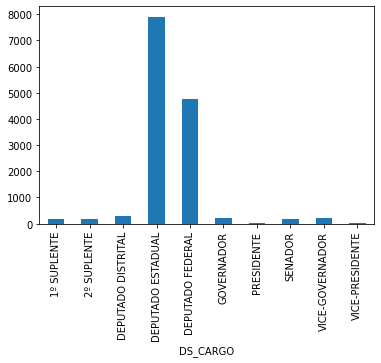

In [177]:
df1 = candidatos.groupby(['DS_CARGO'])['DS_CARGO'].count()
df1.plot(kind='bar')


<AxesSubplot: ylabel='SG_UF'>

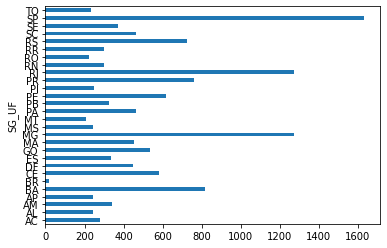

In [178]:
df2 = candidatos.groupby(['SG_UF'])['SG_UF'].count()
df2.plot(kind='barh')

In [179]:

df3 = candidatos.groupby(['SG_UF', 'DS_CARGO', 'DS_GENERO', 'DS_COR_RACA'])
df3.size()

SG_UF  DS_CARGO         DS_GENERO  DS_COR_RACA
AC     1º SUPLENTE      MASCULINO  BRANCA         4
                                   PRETA          2
       2º SUPLENTE      MASCULINO  BRANCA         2
                                   PARDA          4
                                   PRETA          2
                                                 ..
TO     SENADOR          MASCULINO  AMARELA        2
                                   BRANCA         2
       VICE-GOVERNADOR  FEMININO   BRANCA         2
                        MASCULINO  BRANCA         2
                                   PRETA          4
Length: 741, dtype: int64